In [1]:
from pathlib import Path
Path.cwd()

PosixPath('/Users/michinisan/Desktop/HW_2025/モーリスビジネス学院/python/last_project/SynesthesiaKeyboard')

In [ ]:
Draw a letter-paper without lines.
Aimed to 4-7year old kids.
Copy "Klimt" style and make the touch "soft".
The theme is "fruits".

instructions:
-image size: widht=500 px, height=250 px
-margin: 15 x 15 x 15 x 15 pixels
-image type: png
-keep the central area clean
-no hard margins
-you can overlap text space a little
-give the atmosphere of the theme and try not to overpopulate

navigation by keyboard
no need for arrow keys button
add ! ? - buttons instead (not in the side but bellow: as html)
double click to delete sticker! nice
preview button just shut down the app
stricker should be the app size and not resize it
bgm is not playing
light colors har to see in a light background. add some shadow or stroke to font?

font changeable?


In [5]:
def parse_color_file(file_path):
    color_dict = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        
    i = 0
    while i < len(lines):
        # Skip empty lines
        if lines[i].strip() == '':
            i += 1
            continue
            
        # Get the color name (could be on multiple lines)
        color_name = lines[i].strip()
        i += 1
        
        # Check if the next line is also part of the name (not starting with #)
        while i < len(lines) and not lines[i].strip().startswith('#'):
            if lines[i].strip():  # If not empty
                color_name += ' ' + lines[i].strip()
            i += 1
            
        # Get the hex code
        if i < len(lines):
            hex_code = lines[i].strip()
            i += 1
            
            # Add to dictionary
            color_dict[hex_code] = color_name
    
    return color_dict

# Example usage
file_path = 'washoku.txt'  # Replace with your file path
color_dictionary = parse_color_file(file_path)
# print(len(color_dictionary))
# Print the dictionary to verify
import json
print(json.dumps(color_dictionary, ensure_ascii=False, indent=2))

{
  "#f5b1aa": "珊瑚色 さんごいろ",
  "#e95295": "躑躅色 つつじいろ",
  "#d7003a": "紅 くれない",
  "#b7282e": "茜色 あかねいろ",
  "#e45e32": "丹色 にいろ",
  "#eb6101": "朱色 しゅいろ",
  "#f08300": "蜜柑色 みかんいろ",
  "#f8b500": "山吹色 やまぶきいろ",
  "#ffd900": "蒲公英色 たんぽぽいろ",
  "#ffec47": "菜の花色 なのはないろ",
  "#fddea5": "蜂蜜色 はちみついろ",
  "#c3d825": "若草色 わかくさいろ",
  "#007b43": "常磐色 ときわいろ",
  "#69821b": "苔色 こけいろ",
  "#928c36": "鶯色 うぐいすいろ",
  "#bce2e8": "水色 みずいろ",
  "#a0d8ef": "空色 そらいろ",
  "#4c6cb3": "群青色 ぐんじょういろ",
  "#1e50a2": "瑠璃色 るりいろ",
  "#165e83": "藍色 あいいろ",
  "#223a70": "紺色 こんいろ",
  "#bbbcde": "藤色 ふじいろ",
  "#5654a2": "桔梗色 ききょういろ",
  "#cc7eb1": "菖蒲色 あやめいろ",
  "#674196": "菖蒲色 しょうぶいろ",
  "#55295b": "桑の実色 くわのみいろ",
  "#c8c2c6": "霞色 かすみいろ",
  "#949495": "鼠色 ねずみいろ",
  "#96514d": "小豆色 あずきいろ",
  "#bc763c": "土色 つちいろ",
  "#a19361": "油色 あぶらいろ",
  "#762f07": "栗色 くりいろ"
}


In [6]:
# check_sounds.py
import os
from src import config

# Path to your wav files
sound_dir = config.SOUNDS_DIR

print(f"Checking {sound_dir}...")
missing = []

# Get all unique filenames from the map
required_files = set(config.SOUND_MAP.values())

for filename in required_files:
    path = os.path.join(sound_dir, filename)
    if not os.path.exists(path):
        missing.append(filename)

if missing:
    print("❌ Missing these files:")
    for f in sorted(missing):
        print(f" - {f}")
else:
    print("✅ All sound files present!")

Checking /Users/michinisan/Desktop/HW_2025/モーリスビジネス学院/python/last_project/SynesthesiaKeyboard/assets/sounds...
✅ All sound files present!


In [7]:
import json
import random
import os

# --- CONFIGURATION ---
PROFILE_DIR = os.path.join("assets", "profiles")
if not os.path.exists(PROFILE_DIR):
    os.makedirs(PROFILE_DIR)

# 1. Define the palettes
THEMES = {
    "unicorn": [
        "#FF69B4", "#FF1493", "#E6E6FA", "#D8BFD8", "#DA70D6", # Pinks/Purples
        "#8A2BE2", "#00FFFF", "#00BFFF", "#E6CDE3", "#915C8B", # Blues/Violets
        "#FCC9B9", "#A0D8EF", "#F17C67", "#E95295"             # Soft Pastels
    ],
    "rainbow": [
        "#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#32CD32", # Red/Orange/Yellow/Green
        "#0000FF", "#4B0082", "#800080", "#CB1B45", "#F08300", # Blue/Indigo/Violet/Crimson
        "#FFC408", "#3EB370", "#2792C3", "#1E50A2"             # Vibrant Extras
    ],
    "nature": [
        "#228B22", "#006400", "#8B4513", "#A0522D", "#DEB887", # Greens/Browns
        "#F0E68C", "#87CEEB", "#4682B4", "#006E54", "#90B44B", # Sky/Earth/Moss
        "#69821B", "#00A381", "#6C3524", "#D1C0A5"             # Leaf/Wood/Sand
    ]
}

# 2. Define all characters to map
chars = []

# Hiragana (Unicode Range 3041-3096)
chars.extend([chr(i) for i in range(0x3041, 0x3097)])
# Katakana (Unicode Range 30A1-30FA)
chars.extend([chr(i) for i in range(0x30A1, 0x30FB)])
# English & Numbers
chars.extend(list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"))
# Punctuations
chars.extend(["。", "、", "！", "？", "ー"])

# 3. Generate the files
print(f"Generating profiles in: {PROFILE_DIR}")

for theme_name, palette in THEMES.items():
    profile_data = {}
    
    for char in chars:
        # Pick a random color from the theme palette for each character
        profile_data[char] = random.choice(palette)
    
    # Save to JSON
    filename = os.path.join(PROFILE_DIR, f"{theme_name}.json")
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(profile_data, f, ensure_ascii=False, indent=2)
        
    print(f"✅ Created {theme_name}.json")

print("\nDone! Restart the app to see them in the startup list.")

Generating profiles in: assets/profiles
✅ Created unicorn.json
✅ Created rainbow.json
✅ Created nature.json

Done! Restart the app to see them in the startup list.


✅ Saved fruit.png (Size: (500, 250))


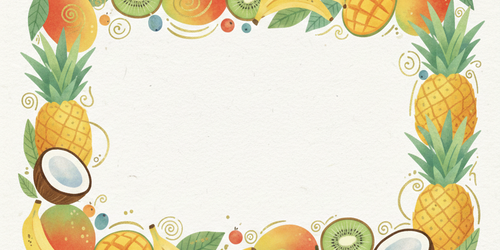

In [6]:
from PIL import Image

def fit_and_crop(input_filename, output_filename, target_w=500, target_h=250):
    try:
        with Image.open(input_filename) as img:
            # --- STEP 1: RESIZE (Fit Width) ---
            # We squash the huge 1024 width down to 500.
            # The height will automatically scale (e.g., 1024 -> 500)
            aspect_ratio = img.height / img.width
            new_height = int(target_w * aspect_ratio)
            
            # High-quality resize
            img_resized = img.resize((target_w, new_height), Image.Resampling.LANCZOS)
            
            # --- STEP 2: CROP (Cut Height) ---
            # Now we have a 500x500 image. We need to cut the top/bottom
            # to make it 500x250.
            
            left = 0
            right = target_w
            
            # Calculate vertical center
            top = (new_height - target_h) / 2
            bottom = (new_height + target_h) / 2
            
            # Perform the crop
            img_final = img_resized.crop((left, top, right, bottom))
            
            # Save
            img_final.save(output_filename, "PNG")
            print(f"✅ Saved {output_filename} (Size: {img_final.size})")
            
            return img_final

    except Exception as e:
        print(f"❌ Error: {e}")

# --- RUN IT ---
# Replace with your filename
fit_and_crop("download.png", "fruit.png")

In [4]:
img = Image.open("download.png")
width, height = img.size
print(width, height)

1024 1024


In [1]:
from PIL import Image
import os

def make_it_light(input_path, output_path, target_w=500, target_h=250, use_quantize=True):
    try:
        with Image.open(input_path) as img:
            
            # --- STEP 1: RESIZE (The biggest savings) ---
            # Calculate new height to keep aspect ratio
            aspect_ratio = img.height / img.width
            new_height = int(target_w * aspect_ratio)
            
            # Resize smoothly
            img_small = img.resize((target_w, new_height), Image.Resampling.LANCZOS)
            
            # --- STEP 2: CROP (Fit to 500x250) ---
            left = 0
            right = target_w
            top = (new_height - target_h) / 2
            bottom = (new_height + target_h) / 2
            
            img_final = img_small.crop((left, top, right, bottom))
            
            # --- STEP 3: QUANTIZE (Optional Color Reduction) ---
            # This converts to 256 colors. Great for Comics/Klimt/Illustration.
            # It makes the file roughly 3x smaller than standard PNG.
            if use_quantize:
                # 'method=2' (FastOctree) is usually best for speed/quality
                img_final = img_final.quantize(colors=256, method=2)
            
            # --- STEP 4: SAVE WITH OPTIMIZATION ---
            # optimize=True works for both PNG and JPEG
            img_final.save(output_path, "PNG", optimize=True)
            
            # Check file size
            kb_size = os.path.getsize(output_path) / 1024
            print(f"✅ Saved: {output_path} ({kb_size:.1f} KB)")

    except Exception as e:
        print(f"❌ Error: {e}")

# --- RUN IT ---
# Compressing your comic theme
# You can set use_quantize=False if you see "banding" or ugly colors
make_it_light("birthday.png", "assets/themes/birthday_optimized.png", use_quantize=True)

✅ Saved: assets/themes/birthday_optimized.png (49.7 KB)


In [2]:
import os
import glob

# Folder containing images
folder_path = "assets/themes"  # Replace with your folder path
output_folder = "assets/themes/optimized"  # Replace with your output folder path

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Find all PNG files (both .png and .PNG)
png_files = glob.glob(os.path.join(folder_path, "*.png"))
png_files.extend(glob.glob(os.path.join(folder_path, "*.PNG")))

# Process each PNG image
for input_path in png_files:
    # Generate output path with same filename but in output folder
    filename = os.path.basename(input_path)
    output_path = os.path.join(output_folder, filename)
    
    # Apply the make_it_light function to each image
    make_it_light(input_path, output_path, use_quantize=True)

✅ Saved: assets/themes/optimized/unicorn.png (24.9 KB)
✅ Saved: assets/themes/optimized/season.png (22.0 KB)
✅ Saved: assets/themes/optimized/space.png (24.0 KB)
✅ Saved: assets/themes/optimized/halloween.png (23.0 KB)
✅ Saved: assets/themes/optimized/matcha.png (25.2 KB)
✅ Saved: assets/themes/optimized/birthday.png (49.7 KB)
✅ Saved: assets/themes/optimized/cat.png (23.4 KB)
✅ Saved: assets/themes/optimized/nature.png (16.8 KB)
✅ Saved: assets/themes/optimized/fruit.png (29.6 KB)
✅ Saved: assets/themes/optimized/christmas.png (48.4 KB)
✅ Saved: assets/themes/optimized/minimal.png (1.0 KB)
✅ Saved: assets/themes/optimized/rainbow.png (17.7 KB)
